In [3]:
# menghubungkan colab dengan google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# memanggil data set lewat gdrive
path = "/content/gdrive/MyDrive/praktikum_ml/praktikum02/"

In [19]:
# membaca file csv menggunakan pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv(path + 'data/500_Person_Gender_Height_Weight_Index.csv')
df


,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [6]:
# Mencari info data pada file (tipe datanya, non nul count data, nama kolom)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [7]:
# Menghitung mean semua kolom numerik
df['Height'].mean()

np.float64(169.944)

In [8]:
# Menghitung Median semua kolom numerik
df['Height'].median()

170.5

In [9]:
# Mencari Modus bisa lebih dari satu
df['Height'].mode()

,Height
0,188


In [10]:
# Menghitung Variansi & Standard Deviasi
df.var(numeric_only=True)

,0
Height,268.149162
Weight,1048.633267
Index,1.836168


In [11]:
# Menghitung Standar Deviasi
df.std(numeric_only=True)

,0
Height,16.375261
Weight,32.382607
Index,1.355053


In [12]:
# Menghitung Kuartil Pertama (Q1)
q1 = df['Height'].quantile(0.25)
print("Q1 : ", q1)

#Hitung Kuartil Ketiga (Q3)
q3 = df['Height'].quantile(0.75)
print("Q3 : ", q3)

#Hitung IQR (interquartile Range)
iqr = q3 - q1
print("IQR : ", iqr)

Q1 :  156.0
Q3 :  184.0
IQR :  28.0


In [13]:
# Untuk membuat statistika deskripsi pada type data int
df.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [14]:
# Menghitung matriks korelasi untuk semua kolom numerik
correlation_matrix = df.corr(numeric_only=True)

# Menampilkan Matriks Korelasi
print("Matriks Korelasi:")
print(correlation_matrix)

Matriks Korelasi:
          Height    Weight     Index
Height  1.000000  0.000446 -0.422223
Weight  0.000446  1.000000  0.804569
Index  -0.422223  0.804569  1.000000


## **VISUALISASI DATA**

---



---



BOX PLOT

<Axes: >

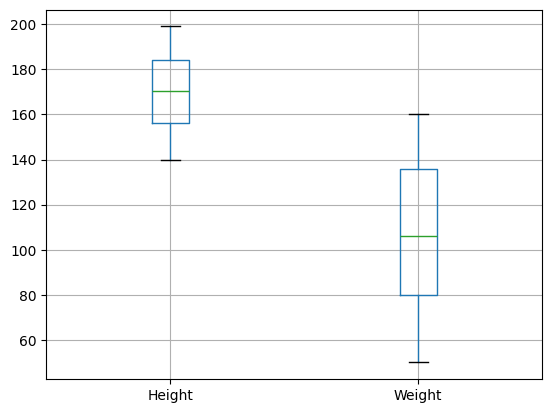

In [15]:
df.boxplot(column=['Height', 'Weight'])

HISTOGRAM

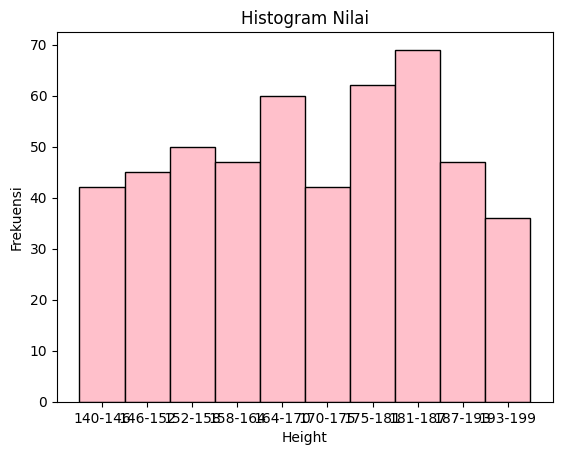

In [16]:
# Ambil data Height
data_height = df['Height']

# Buat Histogram
n, bins, patches = plt.hist(x=data_height, bins='auto', color='pink', edgecolor='black')

# Tambahkan Label
plt.title('Histogram Nilai')
plt.xlabel('Height')
plt.ylabel('Frekuensi')

# Tampilkan rentang Frekuensi di Sumbu X
bin_centers = 0.5 * (bins[:-1] + bins[1:])
plt.xticks(bin_centers, ['{:.0f}-{:.0f}'.format(bins[i], bins[i+1]) for i in range(len(bins) - 1)])

#Tampilkan Histogram
plt.show()

SCATTER PLOT

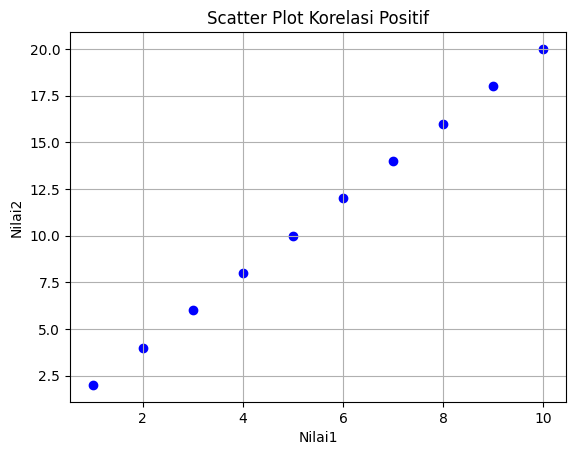

In [17]:
# Buat DataFrame contoh
data = {
    'Nilai1' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Nilai2' : [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
}

df2 = pd.DataFrame(data)

# Buat Scatter Plot
plt.scatter(df2['Nilai1'], df2['Nilai2'], color='Blue', marker='o')

# Tambahkan Label
plt.title('Scatter Plot Korelasi Positif')
plt.xlabel('Nilai1')
plt.ylabel('Nilai2')

# Tambahkan Grid
plt.grid(True)

# Tampilkan Scatter Plot
plt.show()

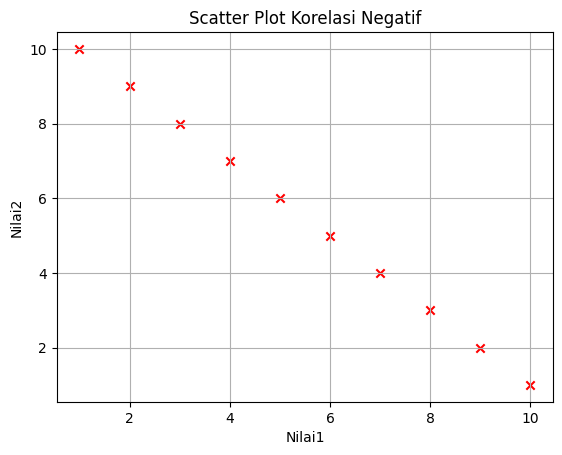

In [18]:
# Buat DataFrame contoh
data = {
    'Nilai1' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Nilai2' : [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
}

df3 = pd.DataFrame(data)

# Buat Scatter Plot
plt.scatter(df3['Nilai1'], df3['Nilai2'], color='Red', marker='x')

# Tambahkan Label
plt.title('Scatter Plot Korelasi Negatif')
plt.xlabel('Nilai1')
plt.ylabel('Nilai2')

# Tambahkan Grid
plt.grid(True)

# Tampilkan Scatter Plot
plt.show()

TUGAS MANDIRI

In [22]:
# Membaca dataset
path = "/content/gdrive/MyDrive/praktikum_ml/praktikum02/data/"
df = pd.read_csv(path + "day.csv")

In [25]:
# Split 80% training dan 20% testing
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Split 10% validation dari data training
train_data, val_data = train_test_split(train_data, test_size=0.1, random_state=42)

In [26]:
# Tampilkan jumlah data
print(f"Jumlah data total: {len(df)}")
print(f"Training: {len(train_data)} data")
print(f"Validation: {len(val_data)} data")
print(f"Testing: {len(test_data)} data")

Jumlah data total: 731
Training: 525 data
Validation: 59 data
Testing: 147 data


In [27]:
# Menampilkan 5 baris pertama dari setiap set
print("\n=== Data Training (5 teratas) ===")
display(train_data.head())

print("\n=== Data Validation (5 teratas) ===")
display(val_data.head())

print("\n=== Data Testing (5 teratas) ===")
display(test_data.head())


=== Data Training (5 teratas) ===


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
657,658,2012-10-19,4,1,10,0,5,1,2,0.563333,0.537896,0.815000,0.134954,753,4671,5424
163,164,2011-06-13,2,0,6,0,1,1,1,0.635000,0.601654,0.494583,0.305350,863,4157,5020
305,306,2011-11-02,4,0,11,0,3,1,1,0.377500,0.390133,0.718750,0.082092,370,3816,4186
111,112,2011-04-22,2,0,4,0,5,1,2,0.336667,0.321954,0.729583,0.219521,177,1506,1683
538,539,2012-06-22,3,1,6,0,5,1,1,0.777500,0.724121,0.573750,0.182842,964,4859,5823



=== Data Validation (5 teratas) ===


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
325,326,2011-11-22,4,0,11,0,2,1,3,0.416667,0.421696,0.962500,0.118792,69,1538,1607
410,411,2012-02-15,1,1,2,0,3,1,1,0.348333,0.351629,0.531250,0.181600,141,4028,4169
92,93,2011-04-03,2,0,4,0,0,0,1,0.378333,0.378767,0.480000,0.182213,1651,1598,3249
47,48,2011-02-17,1,0,2,0,4,1,1,0.435833,0.428658,0.505000,0.230104,259,2216,2475
508,509,2012-05-23,2,1,5,0,3,1,2,0.621667,0.584612,0.774583,0.102000,766,4494,5260



=== Data Testing (5 teratas) ===


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
703,704,2012-12-04,4,1,12,0,2,1,1,0.475833,0.469054,0.733750,0.174129,551,6055,6606
33,34,2011-02-03,1,0,2,0,4,1,1,0.186957,0.177878,0.437826,0.277752,61,1489,1550
300,301,2011-10-28,4,0,10,0,5,1,2,0.330833,0.318812,0.585833,0.229479,456,3291,3747
456,457,2012-04-01,2,1,4,0,0,0,2,0.425833,0.417287,0.676250,0.172267,2347,3694,6041
633,634,2012-09-25,4,1,9,0,2,1,1,0.550000,0.544179,0.570000,0.236321,845,6693,7538
